<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4_%EA%B8%B0%EC%B6%9C%EB%AA%A8%EC%9D%985%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

In [10]:
!git clone https://github.com/ADPclass/ADP_book_ver01.git

Cloning into 'ADP_book_ver01'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 172 (delta 36), reused 61 (delta 19), pack-reused 81 (from 1)
Receiving objects: 100% (172/172), 17.54 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [11]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('/content/ADP_book_ver01/data/27_problem1.csv')
display(df.head(3))
display(df.info())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


None

# 1. 데이터 전처리

(1) 데이터 특징 파악 (EDA)

,count
Class,
0,993
1,200


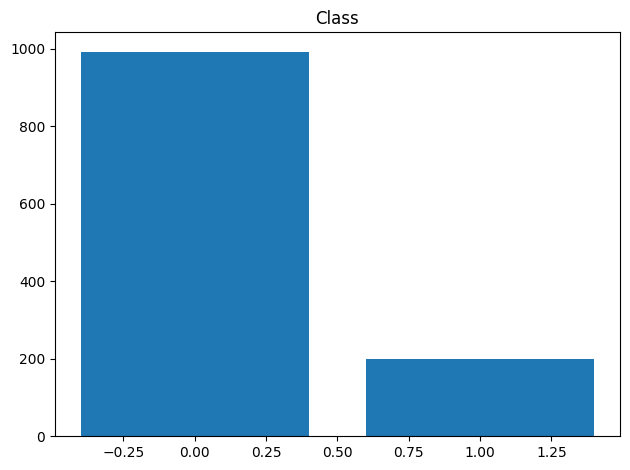

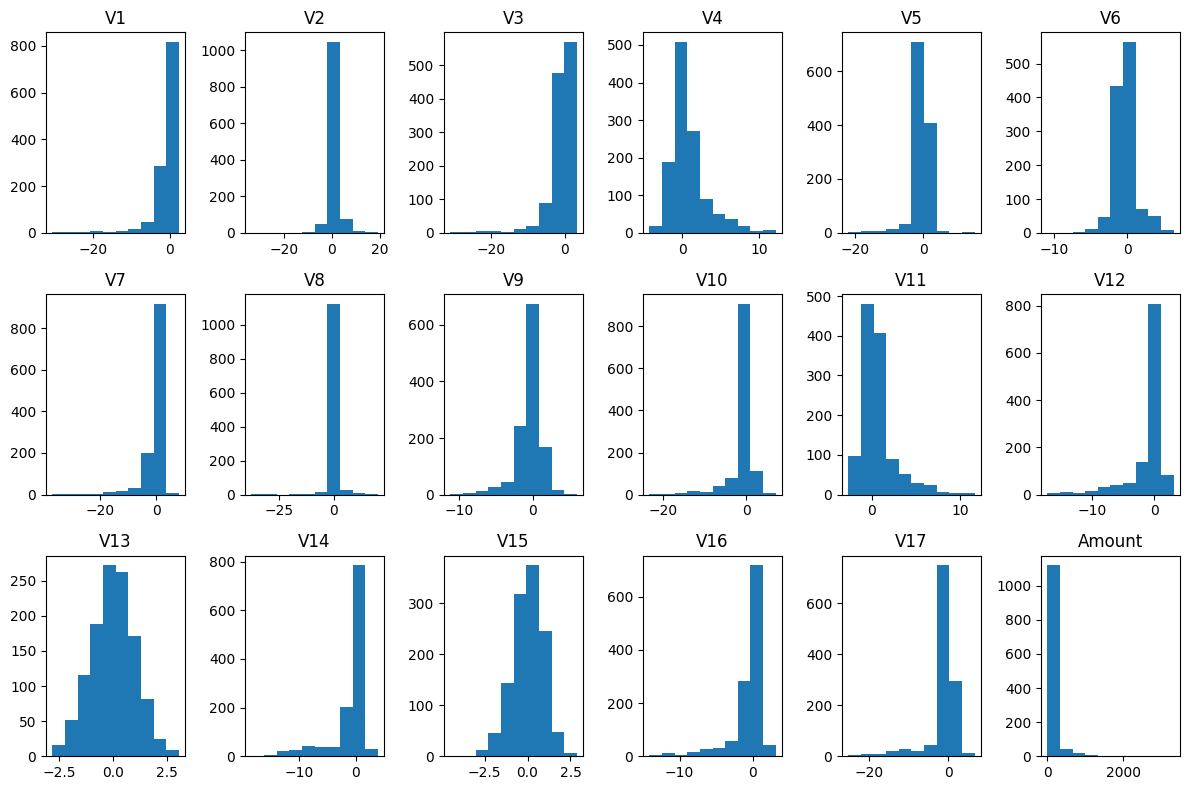

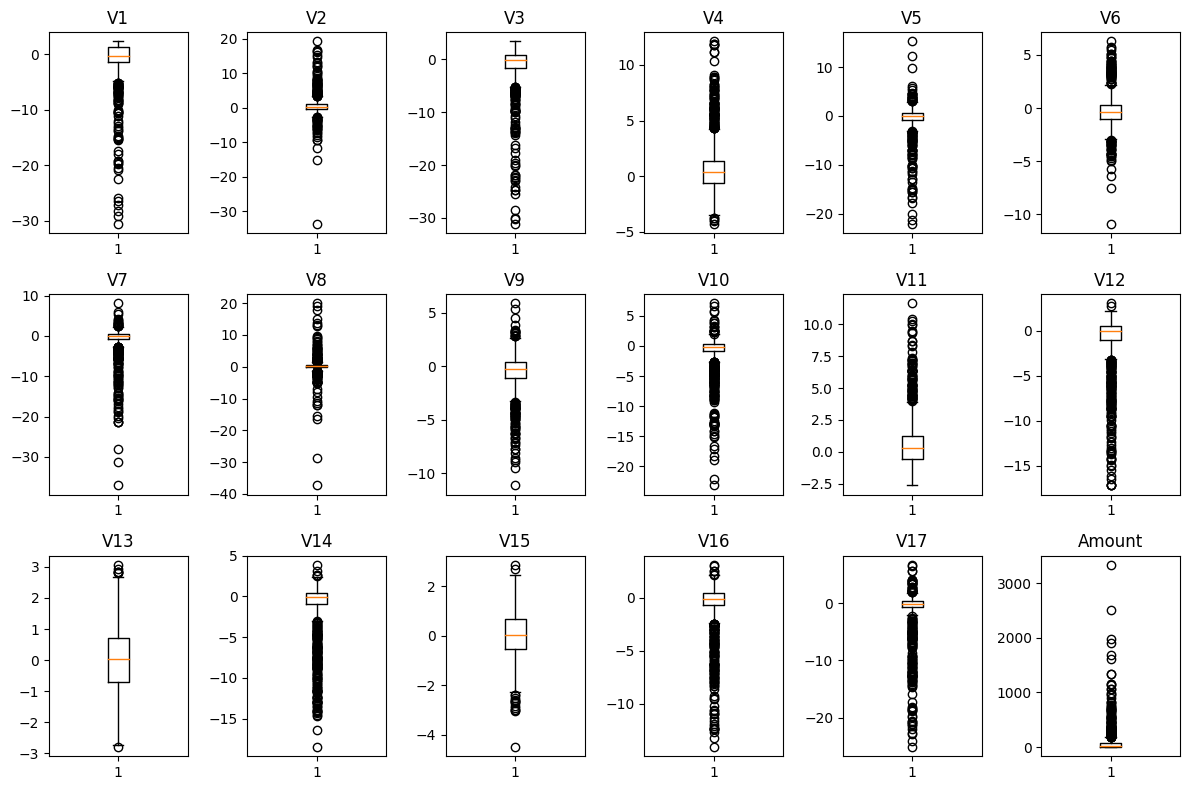

In [ ]:
# 종속변수
Class_type = df['Class'].value_counts()
display(Class_type)
# 0 (정상), 1(사기)로 된 이진형 불균형 클래스 데이터이다.
plt.bar(Class_type.index, Class_type.values)
plt.title('Class')
plt.tight_layout()
plt.show()

# 독립변수
# print(df.columns)
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'Amount']

# 히스토그램
fig, axes = plt.subplots(3, 6, figsize=(12, 8 ))
for col, ax in zip(columns, axes.flatten()) :
  ax.hist(df[col].values)
  ax.set_title(col)
plt.tight_layout()
plt.show()

# 상자형 그림
fig, axes = plt.subplots(3, 6, figsize=(12, 8 ))
for col, ax in zip(columns, axes.flatten()) :
  ax.boxplot(df[col].values)
  ax.set_title(col)
plt.tight_layout()
plt.show()

# V1 ~ V17, Amount 변수 모두 이상치가 있을 가능성이 크다.
# 그러나 이상치 탐지(사기 탐지)라는 데이터 특징상 이상치를 그대로 두는 것이 필요해 보인다.

(2) 상관관계 시각화 및 전처리가 필요함을 설명

<Axes: >

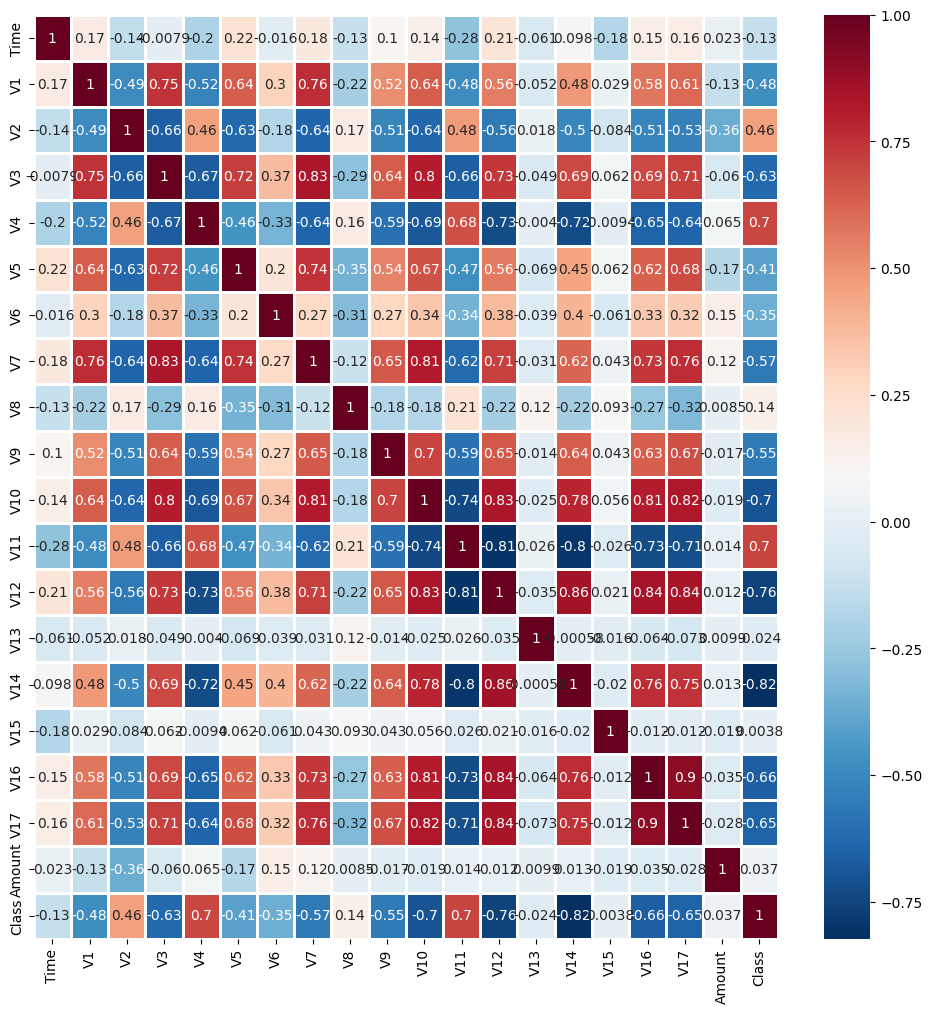

In [ ]:
# 상관관계 시각화
import seaborn as sns
df_corr = df.corr(method='pearson')
fig = plt.figure(figsize=(12,12))
sns.heatmap(df_corr,
            xticklabels = df_corr.columns,
            yticklabels = df_corr.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 1)
# 독립변수간 양의 상관관계가 0.7이상으로 강한 조합이
# V1 - V3, V1 - V7, V3 - V17 등 다수개가 발견된다.
# 종속변수에 양의 상관관계가 0.7이상으로 강한 양의 영향을 주는 것은 V4, V11 이고,
# 음의 상관관계로 -0.7이상으로 강한 음의 영향을 주는 것은 V10, V12, V14 등이 있다.

# 변수간 상관관계가 높은 조합들이 다수개가 있기 때문에
# 다중공선성이 의심되믈 차원축소등의 방법이 필요하다.

# 2. 차원축소

(1) 차원 축소 방법 2가지 이상 비교하고 한 가지를 선택

In [ ]:
#  차원 축소 방법에는 선형 판별 분석(LDA : Linear Discriminant Analysis)과 주성분분석(PCA : Principal Components Analysis)이 있다.
# 1) LDA 선형 판별 분석
# LDA는 클래스 간 분산을 최대화하고 클래스 내 분산을 최소화하는 방향으로 차원을 축소하는 방법이다.
# 주로 분류 문제에서 사용되며, 클래스 레이블을 사용하는 지도 학습 방식이다.
#
# 2) PCA 주성분 분석
# PCA는 데이터의 분산이 가장 큰 방향으로 새로운 축(주성분)을 정의하여 차원을 축소하는 방법이다.
# 사전 분류 정보 없이 작동하는 비지도 학습 방식이다.

# 변수들의 성격을 알 수 없는 해당 데이터에 어울리는 분석은 PCA이다.

(2) 선택한 차원 축소 방법을 수행하고 선택한 이유 설명

In [ ]:
# PCA는 데이터 간의 선형관계만을 가지고 판단하고,
# 주어진 데이터의 분산을 최대한 보존하면서 차원을 축소할 수 있으므로
# 지금과 같이 가명처리되어 있는 변수에 적합한 기법이라 판단하였다.

# 독립 변수 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1, 1), copy = True)
scaled_Amount = scaler.fit(df[['Amount']])
scaled_Amount.transform(df[['Amount']])

array([[-0.94639854],
       [-1.        ],
       [-0.99029298],
       ...,
       [-0.97168836],
       [-0.91006466],
       [-0.99646254]])

In [ ]:
# 원본 데이터에 파생변수 추가
df['Scaled_Amount'] = scaler.transform(df[['Amount']])

# 차원을 축소할 데이터만 추출
features = df.columns.drop(['Time', 'Class', 'Amount'])
print(features)
print(len(features))

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'Scaled_Amount'],
      dtype='object')
18


In [ ]:
from sklearn.decomposition import PCA
# Scree Plot 으로 주성분 개수 정하는 방법 (변수의 개수 18개)
pca = PCA(n_components = 18)
pca_fit = pca.fit(df[features])


 =============== PCA Result Summary ===============

 고유값 : 
 [313.34445642 108.1494526   88.31656842  75.95550775  74.04174398
  54.38022362  48.53052166  44.43119733  42.88301542  41.22188826
  40.02461796  37.7240559   35.89894925  34.29952844  33.25124613
  30.10449767  28.27817612   2.39049112]

 분산설명력 : 
 [6.63121024e-01 7.89946023e-02 5.26784682e-02 3.89643386e-02
 3.70255949e-02 1.99724225e-02 1.59066485e-02 1.33329054e-02
 1.24199371e-02 1.14763697e-02 1.08193995e-02 9.61137507e-03
 8.70386688e-03 7.94557011e-03 7.46731749e-03 6.12084716e-03
 5.40071868e-03 3.85942881e-05]


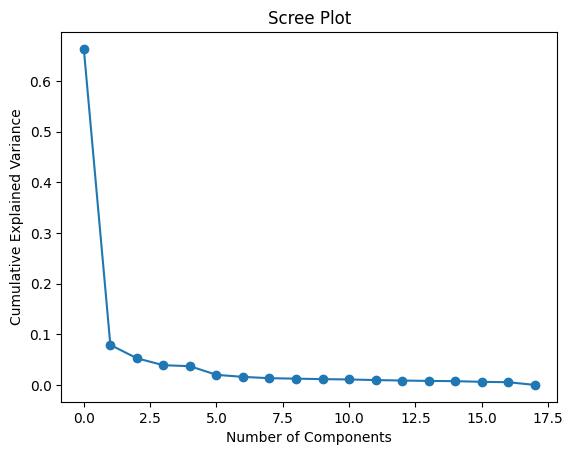

In [ ]:
print('\n =============== PCA Result Summary ===============')
print('\n 고유값 : \n', pca.singular_values_)
print('\n 분산설명력 : \n', pca.explained_variance_ratio_)

# 분산설명력은 PCA를 사용했을 때, 주성분 18개가 원본데이터를 얼마나 설명할 수 있는가를 알려준다.
# 이를 시각화하여 원본데이터를 설명할 수 있는 최적의 주성분 개수를 파악할 수 있다.
# Scree Plot
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [ ]:
print("주성분 3개로 축소할 시 분산설명력 : ",
      pca.explained_variance_ratio_[:3].sum()*100)
print("주성분 4개로 축소할 시 분산설명력 : ",
      pca.explained_variance_ratio_[:4].sum()*100)
# 주성분 3개로 약 80%의 분산설명력을 확보할 수 있다.

주성분 3개로 축소할 시 분산설명력 :  79.47940941729141
주성분 4개로 축소할 시 분산설명력 :  83.37584327245851


# 3. 오버샘플링과 언더샘플링

(1) 오버샘플링과 언더샘플링의 장단점 비교

In [ ]:
# 오버 샘플링은 소수 클래스의 데이터를 인위적으로 늘려 각 클래스간의 비율을 맞추는 방법이다.
# 랜덤 오버 샘플링, SMOTE, ADASYN 등의 방법이 있다.
# SMOTE는 랜덤 오버 샘플링처럼 단순히 복제하는 것이 아니라
# 주변 이웃 데이터를 활용해 새로운 데이터 포인트를 생성하기 때문에 과적합 문제를 줄일 수 있다.

# 언더 샘플링은 다수 클래스의 데이터를 줄여서 각 클래스간의 비율을 맞추는 방법이다.
# 랜덤 언더 샘플링, 클러스터 중심 언더샘플링(Cluster Cenroids), Tomek Links 등의 방법이 있다.
# Tomek Links는 다수 클래스와 소수 클래스간 경계에 있는 다수 클래스 데이터를 제거해 주기 때문에
# 중요한 경계 데이터를 보존할 수 있어 모델의 분류 성능을 높여 준다.

(2) 분류분석 구현 및 샘플링기법 중 2가지 이상의 알고리즘으로 모델 비교 및 성능 측정

,count
Class,
0,993
1,993


(1986, 18)

SMOTE-랜덤포레스트 정확도 : 0.9781879194630873
SMOTE-랜덤포레스트 F1점수 : 0.9778534923339012


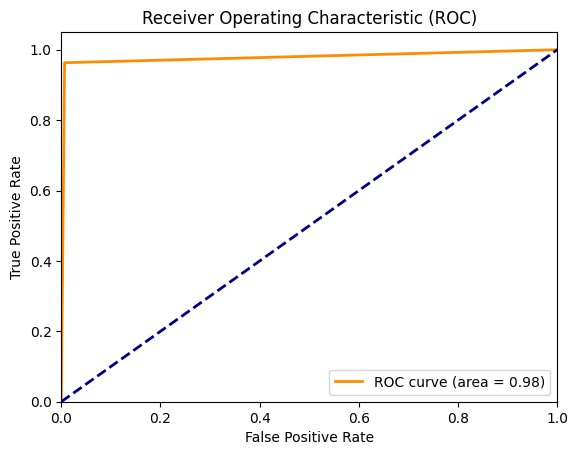

In [ ]:
# 독립변수, 종속변수 분리
X = df.drop(['Time', 'Class', 'Amount'], axis = 1)
y = df['Class']

# 오버샘플링 : SMOTE 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
smt_X, smt_y = sm.fit_resample(X, y)
display(smt_y.value_counts())
display(smt_X.shape)

# 데이터 분할
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(smt_X, smt_y,
                                                    test_size = 0.3,
                                                    stratify = smt_y)

#  랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

# 예측 및 성능 평가
pred_y = rf.predict(test_X)

from sklearn.metrics import accuracy_score, f1_score
rf_acc = accuracy_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)
print(f'SMOTE-랜덤포레스트 정확도 : {rf_acc}')
print(f'SMOTE-랜덤포레스트 F1점수 : {rf_f1}')

# ROC 커브 계산
from sklearn.metrics import roc_curve, auc
pred_y_proba = rf.predict(test_X)

fpr, tpr, _ = roc_curve(test_y, pred_y_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

,count
Class,
0,993
1,993


(1986, 18)

SMOTE-랜덤포레스트 정확도 : 0.9848993288590604
SMOTE-랜덤포레스트 F1점수 : 0.984822934232715


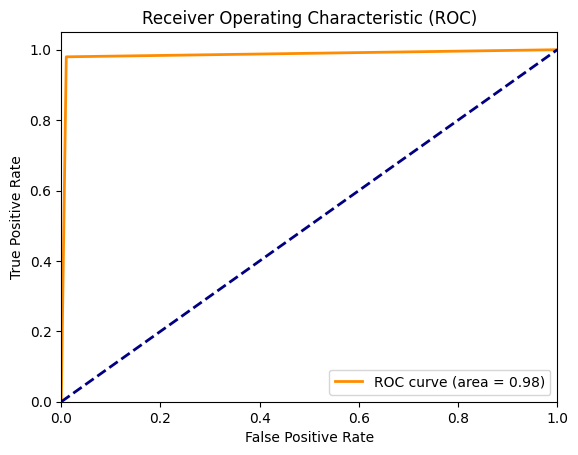

In [ ]:
# 오버샘플링 : RandomOverSampler 적용
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
ros_X, ros_y = ros.fit_resample(X, y)
display(ros_y.value_counts())
display(ros_X.shape)

# 데이터 분할
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(ros_X, ros_y,
                                                    test_size = 0.3,
                                                    stratify = ros_y)

#  랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

# 예측 및 성능 평가
pred_y = rf.predict(test_X)

from sklearn.metrics import accuracy_score, f1_score
rf_acc = accuracy_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)
print(f'SMOTE-랜덤포레스트 정확도 : {rf_acc}')
print(f'SMOTE-랜덤포레스트 F1점수 : {rf_f1}')

# ROC 커브 계산
from sklearn.metrics import roc_curve, auc
pred_y_proba = rf.predict(test_X)

fpr, tpr, _ = roc_curve(test_y, pred_y_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

,count
Class,
0,987
1,200


(1187, 18)

TomekLinks-랜덤포레스트 정확도 : 0.9719887955182073
TomekLinks-랜덤포레스트 F1점수 : 0.9122807017543859


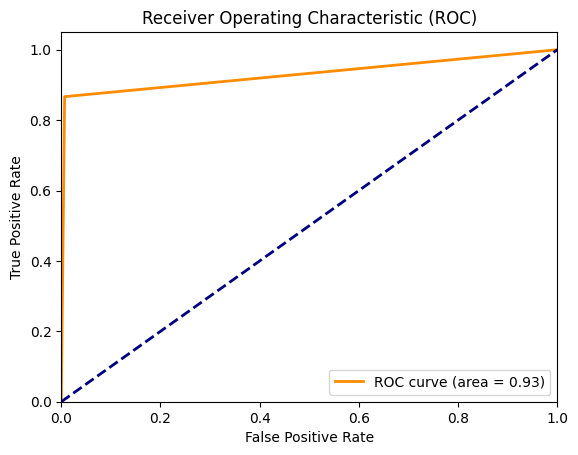

In [ ]:
# 언더샘플링 : Tomek Links 적용
from imblearn.under_sampling import TomekLinks
tmk = TomekLinks()
tmk_X, tmk_y = tmk.fit_resample(X, y)
display(tmk_y.value_counts())
display(tmk_X.shape)

# 데이터 분할
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(tmk_X, tmk_y,
                                                    test_size = 0.3,
                                                    stratify = tmk_y)

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

# 예측 및 성능 평가
pred_y = rf.predict(test_X)

from sklearn.metrics import accuracy_score, f1_score
rf_acc = accuracy_score(test_y, pred_y)
rf_f1 = f1_score(test_y, pred_y)
print(f'TomekLinks-랜덤포레스트 정확도 : {rf_acc}')
print(f'TomekLinks-랜덤포레스트 F1점수 : {rf_f1}')

# ROC 커브 계산
from sklearn.metrics import roc_curve, auc
pred_y_proba = rf.predict(test_X)

fpr, tpr, _ = roc_curve(test_y, pred_y_proba)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

(3) 위에서 구현한 분류 모델 수행 후 결과 분석

In [ ]:
# 분석에 활용한 데이터는 불균형 클래스 데이터이므로
# 정확보보다 F1점수를 중요시하는 것이 바람직하다.
# 따라서 언더샘플링보다는 오버샘플링 기법이 더 좋은 모델이다.
# 오버샘플링 기법 중에는 RandomOverSampler가 약간 더 좋은 F1점수를 기록했다.

# 4. 이상탐지 모델

(1) 이상탐지 모델 2가지 이상 기술하고 장단점 설명

In [ ]:
# DBSCAN
# DBSCAN은 밀도 기반의 클러스터링 알고리즘으로, 밀집된 지역을 클러스터로 그룹화하고,
# 밀도가 낮은 지역을 노이즈 또는 이상치로 간주한다.
# 비지도 학습 방식으로 동작하며, 클러스터의 형상을 가정하지 않고, 밀도가 충분한 점들로
# 클러스터를 형성한다.
#
# SVM
# SVM은 지도 학습 알고리즘으로 분류와 회귀 문제를 해결하는데 사용되지만
# One-Class SVM은 특별히 이상 탐지를 위해 사용되는 비지도 학습 기법이다.
# One-Class SVM은 주로 정상적인 데이터를 사용하여 경계를 학습하고,
# 경계 바깥에 있는 데이터 포인트를 이상치로 간주한다.

(2) 앞서 전처리한 데이터로 한가지 이상의 이상탐지 모델을 구현하고 3번에서 만든 모델과 비교

In [ ]:
# 오버샘플링 : RandomOverSampler 적용
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
ros_X, ros_y = ros.fit_resample(X, y)
display(ros_y.value_counts())
display(ros_X.shape)


from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(ros_X)

# Add the cluster labels to the dataframe
ros_X['DBSCAN_Cluster'] = clusters

# Show the number of clusters found (excluding noise points labeled as -1)
unique_clusters, counts = np.unique(clusters, return_counts=True)
unique_clusters_counts = dict(zip(unique_clusters, counts))

# Output the first few rows of the dataframe with the clusters and the cluster distribution
display(unique_clusters_counts)

,count
Class,
0,993
1,993


(1986, 18)

{-1: 1272,
 0: 6,
 1: 6,
 2: 6,
 3: 7,
 4: 6,
 5: 7,
 6: 5,
 7: 7,
 8: 5,
 9: 7,
 10: 6,
 11: 6,
 12: 8,
 13: 5,
 14: 5,
 15: 8,
 16: 6,
 17: 5,
 18: 5,
 19: 7,
 20: 5,
 21: 5,
 22: 6,
 23: 8,
 24: 5,
 25: 6,
 26: 6,
 27: 7,
 28: 9,
 29: 10,
 30: 6,
 31: 7,
 32: 5,
 33: 6,
 34: 7,
 35: 6,
 36: 5,
 37: 5,
 38: 6,
 39: 8,
 40: 5,
 41: 10,
 42: 7,
 43: 7,
 44: 8,
 45: 12,
 46: 5,
 47: 8,
 48: 6,
 49: 8,
 50: 5,
 51: 6,
 52: 5,
 53: 10,
 54: 5,
 55: 15,
 56: 6,
 57: 7,
 58: 6,
 59: 7,
 60: 5,
 61: 17,
 62: 8,
 63: 7,
 64: 5,
 65: 5,
 66: 6,
 67: 6,
 68: 6,
 69: 6,
 70: 6,
 71: 5,
 72: 10,
 73: 7,
 74: 5,
 75: 10,
 76: 6,
 77: 7,
 78: 10,
 79: 6,
 80: 5,
 81: 8,
 82: 9,
 83: 11,
 84: 6,
 85: 8,
 86: 5,
 87: 5,
 88: 6,
 89: 6,
 90: 5,
 91: 5,
 92: 5,
 93: 6,
 94: 6,
 95: 7,
 96: 7,
 97: 7,
 98: 7,
 99: 13,
 100: 7,
 101: 7,
 102: 5,
 103: 5,
 104: 5,
 105: 6}

(3) 데이터분석가 관점에서 3에서 만든 모델과 4에서 만든 모델을 설명하시오

# 통계분석

## 1. 2년 전 제품생산량이 100,000개, 1년 전 제품생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품생산량이 250,000개 되었을 때, 연평균 상승률의 대표값을 구하시오(반올림, 2)

In [26]:
# CAGR = (최종 연도값 ÷ 최초 연도값)^(1 ÷ 기간(연수)) - 1
CAGR = ((prod_2y / prod_0y)**(1/2))-1
print('CAGR : ', round(CAGR * 100, 2), '%')

import numpy as np
import pandas as pd

prod_0y = 100000
prod_1y = 150000
prod_2y = 250000

rt1 = (prod_1y/prod_0y)
rt2 = (prod_2y/prod_1y)
geo_mean = (rt1 * rt2)**(1/2)
print('기하평균 : ', round(geo_mean *100, 2), '%')

CAGR :  58.11 %
기하평균 :  158.11 %


## 2. 12건의 광고시간을 측정한 데이터에서 평균 15.5초, 분산은 3.2초였다. 이때 광고시간의 90% 신뢰구간을 구하시오.

In [9]:
# 정규분포를 가정하며, 집계한 광고수가 30개 미만이므로
# t-검정을 사용한다.
# n이 30이하이다.

from scipy import stats
mu = 15.5
std = 3.2**(1/2)
df = 12 - 1

print('신뢰구간:', stats.t.interval(confidence = 0.9, loc=15.5, scale=std, df = 11))

신뢰구간: (12.287423572494966, 18.71257642750503)


## 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 유의수준 0.1하에서 검정하시오. (같은 강에서 상류, 하류는 서로 독립적이지 않으며, 종속 관계에 있음. 정규성 가정)

In [16]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/ADP_book_ver01/data/27_problem7.csv')
display(df)
display(df.shape)

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


(5, 3)

(1) 귀무가설과 대립가설을 세우시오

In [13]:
# H0 : 상, 하류간 생물 다양성 점수에 차이가 없다.
# H1 : 상, 하류간 생물 다양성 점수에 차이가 있다.

TtestResult(statistic=3.3526056764717995, pvalue=0.028499777234053288, df=4)

(2) 검정통계량과 유의확률을 구하고, 연구가설 채택여부를 검정하시오

In [14]:
import scipy.stats as stats
stats.ttest_rel(df['up'], df['down'])

# 유의수준 0.1 하에서 p-value가 0.03 이므로 귀무가설을 기각한다.
# 즉, 상, 하류간 생물 다양성 점수에 차이가 있다.

TtestResult(statistic=3.3526056764717995, pvalue=0.028499777234053288, df=4)

## 4. user_counts를 종속변수로 하는 데이터

(1) 분위수 회귀분석(Quantile Regression)을 사용하여 회귀계수를 구하시오(반올림, 2)

In [20]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/ADP_book_ver01/data/27_problem.csv')
display(df.head(5), df.shape)

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


(2097, 4)

In [27]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split
print(df.columns)
X = df[['temperature', 'wind', 'precipitation']]
y = df['user_counts']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3)

model = QuantileRegressor()
model.fit(X_train, y_train)

print('회귀 계수 :', model.coef_)
print('절편 :', model.intercept_)
# temperature : 217.4
# wind : 0
# precipitation : 0

Index(['temperature', 'wind', 'precipitation', 'user_counts'], dtype='object')
회귀 계수 : [217.40608229   0.           0.        ]
절편 : 5958.771019677997


(2) (1)의 회귀계수를 활용하여 temperature 10.5, wind 8.2, precipitation 3.5 일 때 user_counts를 예측하시오(반올림, 2)

In [29]:
result = 10.5 * model.coef_[0] + 8.2 * model.coef_[1] + 3.5 * model.coef_[2] + model.intercept_
print(result)
# 8241.5

8241.534883720931


## 5. 지하철 호선과 월별, 승객 수간 상관관계가 있는지 확인하시오

(1) 귀무가설과 대립가설을 설정하시오

In [32]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/ADP_book_ver01/data/27_problem9.csv')
display(df.head(), df.shape)

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


(72, 3)

In [ ]:
# 상호작용 효과 검정에 대한 가설
# 귀무가설 : 지하철 호선과 월별 승객 수간 상관관계가 없다
# 대립가설 : 지하철 호선과 월별 승객 수간 상관관계가 있다

# 주효과 검정에 대한 가설 1
# 귀무가설 : 지하철 호선 승객 수 차이는 존재하지 않는다
# 대립가설 : 지하철 호선 승객 수 차이는 존재한다

# 주효과 검정에 대한 가설 2
# 귀무가설 : 지하철 월별 승객 수 차이는 존재하지 않는다
# 대립가설 : 지하철 월별 승객 수 차이는 존재한다

(2) Type III Anova를 사용하여 상관관계가 있는지 검정하시오

In [33]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'total ~ C(line) * C(month)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ = 3)
aov_table
# C(line):C(month) 상호작용 효과 검정에서 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다
# C(line)	주효과 검정1에서 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다
# C(month) 주효과 검정2에서 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN
